### Introduction

In [1]:
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import itemgetter
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

# Decide about the database column headers by getting detail data insight at: https://archive.ics.uci.edu/ml/datasets/automobile
col_name = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
            'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
            'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 
            'city-mpg', 'highway-mpg', 'price']

### Getting Information About the Dataset

In [2]:
cars = pd.read_csv(r"./databank/import-85.csv", names=col_name)
cars.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

### Select Columns with Continuous Data Values

In [4]:
# Using data info available at: http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names
col_vals = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 
            'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars_num = cars[col_vals]
cars_num.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.4,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.4,8.0,115,5500,18,22,17450


### Prepare Data for Missing Value Fill-up by Replacing Special Characters

In [5]:
# As seen above, the dataframe carries "?". Replace it with null value
cars_num = cars_num.replace("?", np.NaN)
cars_num.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.4,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.4,8.0,115,5500,18,22,17450


### Convert All Values to Same Data Type

In [6]:
# Convert all columns of the dataframe to float data type
cars_num = cars_num.astype('float64')
# Check for all columns data type
cars_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null float64
highway-mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(14)
memory usage: 22.5 KB


### Select Target Column

In [7]:
target_col = cars_num['price']

### Remove Null Values from Target Columns

In [8]:
cars_num = cars_num.dropna(subset=['price'], axis=0)
cars_num['price'].isnull().sum()

0

### Check for Null Values in Other Columns

In [9]:
cars_num.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

### Fill out Missing Column Values

In [10]:
# Fill out the missing values with column mean
cars_num = cars_num.fillna(cars_num.mean())
# Check for no null values
cars_num.isnull().sum().sum()

0

### Feature Scaling

In [11]:
temp_target = cars_num['price']
cars_num = (cars_num - cars_num.mean())/(cars_num.max() - cars_num.min())
cars_num['price'] = temp_target
cars_num.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.000000,-0.297289,-0.080612,-0.152911,-0.413889,-0.002974,0.099492,-0.274716,-0.072767,0.035528,-0.047995,-0.116086,-0.097015,13495.0
1,0.000000,-0.297289,-0.080612,-0.152911,-0.413889,-0.002974,0.099492,-0.274716,-0.072767,0.035528,-0.047995,-0.116086,-0.097015,16500.0
2,0.000000,-0.125277,-0.044791,-0.033253,-0.113889,0.103698,-0.464793,0.101474,-0.072767,0.236463,-0.047995,-0.171642,-0.123331,16500.0
3,0.219895,0.029242,0.035806,0.026577,0.044444,-0.084820,-0.100508,0.068141,-0.010267,-0.006528,0.156087,-0.032753,-0.018068,13950.0
4,0.219895,0.017580,0.035806,0.043671,0.044444,0.104086,-0.100508,0.068141,-0.135267,0.054220,0.156087,-0.199420,-0.228594,17450.0


### Develop Univariate Model

In [12]:
# Set up a function that develop model and return RMSE

def knn_train_test(train_col, test_col, data):    

# Randomize the data 
    np.random.seed(1)
    shuflled_idx = np.random.permutation(data.index)
    data_rand = data.reindex(shuflled_idx)

# Divide the data set 50/50 between the training and test set 
    break_pt = int(round(len(data)/2, 0))
    train_df = data_rand.iloc[:break_pt]
    test_df = data_rand.iloc[break_pt+1:]
    
# Defining the Training and Test Set
    train_features = train_df[[train_col]]
    train_target = train_df[test_col]
    test_features = test_df[[train_col]]
    test_target = test_df[test_col]

# Develop KNeighbor Regression
    knn = KNeighborsRegressor()     
    knn.fit(train_features, train_target)
    predictions = knn.predict(test_features)

# Calculate the model error matrix
    mse_val = mean_squared_error(test_target, predictions)
    rmse = m.sqrt(mse_val)
    return rmse

trn_col = cars_num.drop(labels='price', axis=1).columns
tst_col = 'price'
rmse_dict = {}

for col in trn_col:
    rmse_dict[col] = knn_train_test(col, 'price', cars_num)
rmse_dict

{'bore': 6822.548760309449,
 'city-mpg': 4998.449685132381,
 'compression-rate': 6628.568722823954,
 'curb-weight': 4422.255745566961,
 'height': 7857.62725440702,
 'highway-mpg': 4675.883732044671,
 'horsepower': 4011.999335643016,
 'length': 5455.571648177668,
 'normalized-losses': 7338.850271289094,
 'peak-rpm': 7698.121918961792,
 'stroke': 7965.733340477825,
 'wheel-base': 5486.805326526539,
 'width': 4931.242155725067}

### Univariate Model with Multiple Clusters

In [13]:
# Defining the number of split values as variable
cluster_num = [1, 3, 5, 7, 9]

# Set up function that develop model that can handle multiple split values and generate RMSE
def knn_train_test_splits(train_col, test_col, data): 
    
# Randomize the data 
    np.random.seed(1)
    shuflled_idx = np.random.permutation(data.index)
    data_rand = data.reindex(shuflled_idx)

# Divide the data set 50/50 between the training and test set 
    break_pt = int(round(len(data)/2, 0))
    train_df = data.iloc[:break_pt]
    test_df = data.iloc[break_pt+1:]

# Defining the Training and Test Set
    train_features = train_df[[train_col]]
    train_target = train_df[test_col]
    test_features = test_df[[train_col]]
    test_target = test_df[test_col]

# Develop KNeighbor Regression
    rmse_val = {}
    for i in cluster_num:
        knn = KNeighborsRegressor(n_neighbors = i) 
        knn.fit(train_features, train_target)
        predictions = knn.predict(test_features)

# Calculate the model error matrix
        mse_val = mean_squared_error(test_target, predictions)
        rmse_val[i] = m.sqrt(mse_val)
    return rmse_val

# Establish RMSE dictionary with varying clusters for every feature of the dataset
RMSE_MC = {}
trn_col = cars_num.drop(labels='price', axis=1).columns
tst_col = 'price'
for i in trn_col:
    RMSE_MC[i] = knn_train_test_splits(i, tst_col, cars_num)

RMSE_MC

{'bore': {1: 16584.92378245978,
  3: 13996.721161043395,
  5: 13420.66013722127,
  7: 11079.213535955796,
  9: 10217.599521613385},
 'city-mpg': {1: 5365.433446609883,
  3: 5234.360540484174,
  5: 4796.381435749246,
  7: 4579.778132559413,
  9: 4743.612991690856},
 'compression-rate': {1: 8125.434180399223,
  3: 8178.550223059776,
  5: 8136.40761621491,
  7: 7934.111996902223,
  9: 7856.87625370601},
 'curb-weight': {1: 6506.062797114703,
  3: 5618.008230878825,
  5: 5164.381316866522,
  7: 5245.599869783965,
  9: 5228.853464251726},
 'height': {1: 13086.66478901328,
  3: 11351.195125967035,
  5: 10835.39508699152,
  7: 9957.21417984294,
  9: 9258.219431789274},
 'highway-mpg': {1: 5095.432138690496,
  3: 4500.45206963824,
  5: 4398.904134031566,
  7: 3911.670503683529,
  9: 3718.106564511261},
 'horsepower': {1: 7062.084135720843,
  3: 5424.37770347899,
  5: 4182.751064168175,
  7: 3861.016243484218,
  9: 3503.520831998422},
 'length': {1: 10295.140528909744,
  3: 8388.354331982458,
 

### Plot the Univariate Multicluster Model Results

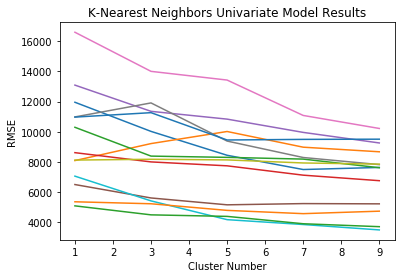

In [14]:
# Developing the plot series
for k, v in RMSE_MC.items():
    X = list(v.keys())
    y = list(v.values())
    
    plt.plot(X, y)
    plt.xlabel("Cluster Number")
    plt.ylabel("RMSE")
    plt.title("K-Nearest Neighbors Univariate Model Results")
plt.show()

### Develop Multivariate Model (Default Clusters)

In [15]:
# Develop Multivariate Model with Single Default Neighbor Value as 5 from scikit-learn

def knn_train_test_mv(train_col, test_col, data):    

# Randomize the data 
    np.random.seed(1)
    shuflled_idx = np.random.permutation(data.index)
    data_rand = data.reindex(shuflled_idx)

# Divide the data set 50/50 between the training and test set 
    break_pt = int(round(len(data)/2, 0))
    train_df = data_rand.iloc[:break_pt]
    test_df = data_rand.iloc[break_pt+1:]
    
# Defining the Training and Test Set
    train_features = train_df[train_col]
    train_target = train_df[test_col]
    test_features = test_df[train_col]
    test_target = test_df[test_col]

# Develop KNeighbor Regression
    knn = KNeighborsRegressor()     
    knn.fit(train_features, train_target)
    predictions = knn.predict(test_features)

# Calculate the model error matrix
    mse_val = mean_squared_error(test_target, predictions)
    rmse = m.sqrt(mse_val)
    return rmse

# Trying different best features and verify how RMSE varies 
# To identify the preference of top 5 best features, let's extract 
# the RMSE value in ascending order from the previous Univariate Model

best_features = {}
for k, v in RMSE_MC.items():
    best_features[k] = sum(v.values())/len(v.values())

top5_nn = sorted(best_features.items(), key=itemgetter(1))
print(top5_nn)

rmse_mv = {}

two_best_features = ['horsepower', 'highway-mpg']
three_best_features = ['horsepower', 'highway-mpg', 'city-mpg']
four_best_features = ['horsepower', 'highway-mpg', 'city-mpg','curb-weight']
five_best_features = ['horsepower', 'highway-mpg', 'city-mpg','curb-weight', 'width']
six_best_features = ['horsepower', 'highway-mpg', 'city-mpg','curb-weight', 'width', 'compression-rate']

rmse_mv_keys = ['two_best_features', 'three_best_features', 'four_best_features', 'five_best_features', 'six_best_features']
rmse_mv_vals = [two_best_features, three_best_features, four_best_features, five_best_features, six_best_features]

for i in range(len(rmse_mv_keys)):
    rmse_mv[rmse_mv_keys[i]] = knn_train_test_mv(rmse_mv_vals[i], 'price', cars_num)
    
rmse_mv

[('highway-mpg', 4324.913082111018), ('horsepower', 4806.74999577013), ('city-mpg', 4943.913309418715), ('curb-weight', 5552.581135779148), ('width', 7650.761583706224), ('compression-rate', 8046.276054056429), ('length', 8559.743869768059), ('wheel-base', 8995.63364023381), ('normalized-losses', 9111.30792433557), ('stroke', 9678.461938838354), ('peak-rpm', 10137.80268477531), ('height', 10897.737722720809), ('bore', 13059.823627658723)]


{'five_best_features': 3354.768120153761,
 'four_best_features': 3497.917667698884,
 'six_best_features': 3542.0349199295024,
 'three_best_features': 3353.1645428758793,
 'two_best_features': 3280.770311801788}

### Multivariate Model With Multiple Clusters

In [16]:
# Develop Multivariate Model with Multiple Neighbor Values Using the Top 6 Best Features from above

def knn_train_test_mvc(train_col, test_col, data):    

# Randomize the data 
    np.random.seed(1)
    shuflled_idx = np.random.permutation(data.index)
    data_rand = data.reindex(shuflled_idx)

# Divide the data set 50/50 between the training and test set 
    break_pt = int(round(len(data)/2, 0))
    train_df = data_rand.iloc[:break_pt]
    test_df = data_rand.iloc[break_pt+1:]    

# Defining the Training and Test Set
    train_features = train_df[train_col]
    train_target = train_df[test_col]
    test_features = test_df[train_col]
    test_target = test_df[test_col]

# Defining the cluster values from 1 - 25
    k_val = [x for x in range(25)]
    rmse_val_mvc = {}
    
# Develop KNeighbor Regression
    for k in k_val:
        knn = KNeighborsRegressor(n_neighbors = k + 1)     
        knn.fit(train_features, train_target)
        predictions = knn.predict(test_features)

# Calculate the model error matrix
        mse_val_mvc = mean_squared_error(test_target, predictions)
        rmse_val_mvc[k + 1] = m.sqrt(mse_val_mvc)
    return rmse_val_mvc

rmse_mvc = {}

two_best_features = ['horsepower', 'highway-mpg']
three_best_features = ['horsepower', 'highway-mpg', 'city-mpg']
four_best_features = ['horsepower', 'highway-mpg', 'city-mpg','curb-weight']
five_best_features = ['horsepower', 'highway-mpg', 'city-mpg','curb-weight', 'width']
six_best_features = ['horsepower', 'highway-mpg', 'city-mpg','curb-weight', 'width', 'compression-rate']

rmse_mvc_keys = ['two_best_features', 'three_best_features', 'four_best_features', 'five_best_features', 'six_best_features']
rmse_mvc_vals = [two_best_features, three_best_features, four_best_features, five_best_features, six_best_features]

for i in range(len(rmse_mvc_keys)):
    rmse_mvc[rmse_mvc_keys[i]] = knn_train_test_mvc(rmse_mvc_vals[i], 'price', cars_num)
    
rmse_mvc

{'five_best_features': {1: 2522.34322803222,
  2: 2901.265709565396,
  3: 3194.7981612476106,
  4: 3179.8159698125614,
  5: 3354.768120153761,
  6: 3554.219122903245,
  7: 3835.365094826338,
  8: 4023.857588049837,
  9: 4011.8186578325463,
  10: 4159.130326354297,
  11: 4363.387571221952,
  12: 4437.940498042607,
  13: 4516.051228751735,
  14: 4485.415098427801,
  15: 4496.478315936694,
  16: 4575.928353273997,
  17: 4619.454166523248,
  18: 4678.060992505203,
  19: 4710.954185222263,
  20: 4735.107799200563,
  21: 4779.058044867539,
  22: 4811.659056250249,
  23: 4830.614628012334,
  24: 4903.95236785043,
  25: 4948.054413629665},
 'four_best_features': {1: 2726.3392488830145,
  2: 2686.8332410106887,
  3: 3053.8303944027048,
  4: 3140.17829688857,
  5: 3497.917667698884,
  6: 3812.048222339854,
  7: 3975.2003164004454,
  8: 4134.100658603846,
  9: 4354.96304487446,
  10: 4461.40887272171,
  11: 4583.420441228841,
  12: 4645.517198952543,
  13: 4732.750936891872,
  14: 4682.1360188192

### Plot the Multivariate Multicluster Model Result

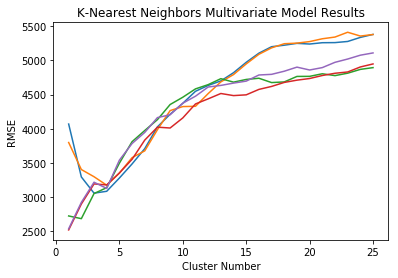

In [17]:
# Developing the plot series
for k, v in rmse_mvc.items():
    X = list(v.keys())
    y = list(v.values())
    
    plt.plot(X, y)
    plt.xlabel("Cluster Number")
    plt.ylabel("RMSE")
    plt.title("K-Nearest Neighbors Multivariate Model Results")
plt.show()

### Develop Univariate Model Using KFold Cross Validation

In [18]:
# Develop Univariate KFold Model with default Split Value and default number of neighbors from scikit-learn

def kfold_train_test(train_col, test_col, data):    
    
# Divide the data set 50/50 between the training and test set & randomize the data
    kfd = KFold(n_splits = 3, shuffle=True)

# Develop KNeighbor Regression
    knn = KNeighborsRegressor(n_neighbors=5)
    for train_index, test_index, in kfd.split(data):
        train_kf = data.iloc[train_index]
        test_kf = data.iloc[test_index]
            
        train_features = train_kf[[train_col]]
        train_target = train_kf[test_col]
        test_features = test_kf[[train_col]]
        test_target = test_kf[test_col]
            
        knn.fit(train_features, train_target)
        predictions = knn.predict(test_features)

# Calculate the model error matrix
    
        mse_val_kfd = mean_squared_error(test_target, predictions)
        rmse_val_kfd = m.sqrt(mse_val_kfd)
    return rmse_val_kfd

trn_col = cars_num.drop(labels='price', axis=1).columns
tst_col = 'price'
rmse_val_kfd = {}

for col in trn_col:
    rmse_val_kfd[col] = kfold_train_test(col, 'price', cars_num)
rmse_val_kfd

{'bore': 5315.196622470554,
 'city-mpg': 3970.033239907463,
 'compression-rate': 5887.687591180707,
 'curb-weight': 3501.748088146236,
 'height': 8786.4885851355,
 'highway-mpg': 5220.101166058049,
 'horsepower': 3046.2973485072644,
 'length': 5788.265244775899,
 'normalized-losses': 7441.517813641668,
 'peak-rpm': 7973.661074521746,
 'stroke': 6494.111632741422,
 'wheel-base': 5116.804072506383,
 'width': 5293.788718133621}

### Univariate Model Using KFold Cross Validation with Multiple Clusters

In [19]:
# Set up a KFold cross validation that develop model with multiple clusters, 5 data folds and return RMSE
clusters = [1, 3, 5, 7, 9]

def kfold_train_test_mc(train_col, test_col, data):    
    
# Divide the data set between the training and test set & randomize the data
    kfd = KFold(n_splits = 5, shuffle=True)
    kfold_rmse = []
    rmse_kfd = {}

# Develop KNeighbor Regression.
    for i in clusters:
        knn = KNeighborsRegressor(n_neighbors=i)
        for train_index, test_index, in kfd.split(data):
            train_kf = data.iloc[train_index]
            test_kf = data.iloc[test_index]
            
            train_features = train_kf[[train_col]]
            train_target = train_kf[test_col]
            test_features = test_kf[[train_col]]
            test_target = test_kf[test_col]
            
            knn.fit(train_features, train_target)
            predictions = knn.predict(test_features)

# Calculate the model error matrix  
            mse_val_kfd = mean_squared_error(test_target, predictions)
            kfold_rmse.append(m.sqrt(mse_val_kfd))
        rmse_kfd[i] = np.mean(kfold_rmse)
    return rmse_kfd

trn_col = cars_num.drop(labels='price', axis=1).columns
tst_col = 'price'
rmse_kfd_mc = {}

for col in trn_col:
    rmse_kfd_mc[col] = kfold_train_test_mc(col, 'price', cars_num)
rmse_kfd_mc

{'bore': {1: 8327.580323142378,
  3: 7720.6813663367575,
  5: 7492.325530997303,
  7: 7374.399857383169,
  9: 7352.568758535477},
 'city-mpg': {1: 5828.667481490455,
  3: 5168.2724354332095,
  5: 4938.520978279707,
  7: 4859.184409918129,
  9: 4820.060025184927},
 'compression-rate': {1: 7454.196136549045,
  3: 6754.529212345032,
  5: 6537.510448639073,
  7: 6467.330432243976,
  9: 6437.81121532997},
 'curb-weight': {1: 5085.238679780281,
  3: 4804.846374645145,
  5: 4554.712194791633,
  7: 4435.020606905218,
  9: 4363.053844653614},
 'height': {1: 9973.755654217723,
  3: 9221.338751721212,
  5: 8768.746580435898,
  7: 8507.875765205785,
  9: 8329.161769481676},
 'highway-mpg': {1: 5048.597895835071,
  3: 4735.764950214003,
  5: 4535.664067908839,
  7: 4507.060816581736,
  9: 4433.2881070163685},
 'horsepower': {1: 3812.5600141720306,
  3: 3820.459679685042,
  5: 3767.518513405144,
  7: 3881.778373023022,
  9: 3960.244843781488},
 'length': {1: 5527.271226810661,
  3: 5401.698797360317

### Plot Univariate Multicluster Kfold Cross Validation Result

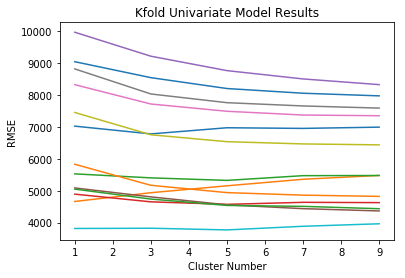

In [20]:
# Developing the Kfold plot series
for k, v in rmse_kfd_mc.items():
    X = list(v.keys())
    y = list(v.values())
    
    plt.plot(X, y)
    plt.xlabel("Cluster Number")
    plt.ylabel("RMSE")
    plt.title("Kfold Univariate Model Results")
plt.show()

### Identify the Top 5 Best Features from KFold Cross Validation

In [21]:
best_kfd_features = {}
for k, v in rmse_kfd_mc.items():
    best_kfd_features[k] = sum(v.values())/len(v.values())

# Print features in ascending order of error values
top5_kfd = sorted(best_kfd_features.items(), key=itemgetter(1))
print(top5_kfd)

[('horsepower', 3848.5122848133456), ('curb-weight', 4648.574340155178), ('highway-mpg', 4652.075167511202), ('width', 4673.577967600274), ('wheel-base', 5116.810863565681), ('city-mpg', 5122.941066061286), ('length', 5439.649080449456), ('compression-rate', 6730.275489021418), ('normalized-losses', 6946.285500703384), ('bore', 7653.511167279017), ('stroke', 7974.481579112568), ('peak-rpm', 8367.758998807994), ('height', 8960.17570421246)]


### Multivariate KFold Cross Validation With Multiple Clusters

In [22]:
# Set up a KFold cross validation that develop model with multiple clusters, 10 data folds and return RMSE
clusters_mvmc = [x for x in range(1, 26)]

def kfold_train_test_mvmc(train_col, test_col, data):    
    
# Divide the data set between the training and test set & randomize the data
    kfd = KFold(n_splits = 10, shuffle=True)
    kfold_rmse_mvmc = []
    rmse_kfd_mvmc = {}

# Develop KNeighbor Regression 
    for k in clusters_mvmc:
        knn = KNeighborsRegression(n_neighbors= k)
        for train_index, test_index, in kfd.split(data):
            train_kf = data.iloc[train_index]
            test_kf = data.iloc[test_index]
            
            train_features = train_kf[[train_col]]
            train_target = train_kf[test_col]
            test_features = test_kf[[train_col]]
            test_target = test_kf[test_col]
            
            knn.fit(train_features, train_target)
            predictions = knn.predict(test_features)

# Calculate the model error matrix  
            mse_val_mvmc = mean_squared_error(test_target, predictions)
            kfold_rmse_mvmc.append(m.sqrt(mse_val_mvmc))
        rmse_kfd_mvmc[i] = np.mean(kfold_rmse_mvmc)
    return rmse_kfd_mvmc

rmse_mvmc = {}

two_best_features = ['horsepower', 'curb-weight']
three_best_features = ['horsepower', 'curb-weight', 'width']
four_best_features = ['horsepower', 'curb-weight', 'width','city-mpg']
five_best_features = ['horsepower', 'curb-weight', 'width','city-mpg', 'highway-mpg']
six_best_features = ['horsepower', 'curb-weight', 'width','city-mpg', 'highway-mpg', 'wheel-base']

rmse_mvmc_keys = ['two_best_features', 'three_best_features', 'four_best_features', 'five_best_features', 'six_best_features']
rmse_mvmc_vals = [two_best_features, three_best_features, four_best_features, five_best_features, six_best_features]

for i in range(len(rmse_mvmc_keys)):
    rmse_mvmc[rmse_mvmc_keys[i]] = knn_train_test_mvc(rmse_mvmc_vals[i], 'price', cars_num)

rmse_mvmc

{'five_best_features': {1: 2522.34322803222,
  2: 2901.265709565396,
  3: 3194.7981612476106,
  4: 3179.8159698125614,
  5: 3354.768120153761,
  6: 3554.219122903245,
  7: 3835.365094826338,
  8: 4023.857588049837,
  9: 4011.8186578325463,
  10: 4159.130326354297,
  11: 4363.387571221952,
  12: 4437.940498042607,
  13: 4516.051228751735,
  14: 4485.415098427801,
  15: 4496.478315936694,
  16: 4575.928353273997,
  17: 4619.454166523248,
  18: 4678.060992505203,
  19: 4710.954185222263,
  20: 4735.107799200563,
  21: 4779.058044867539,
  22: 4811.659056250249,
  23: 4830.614628012334,
  24: 4903.95236785043,
  25: 4948.054413629665},
 'four_best_features': {1: 2508.700263084452,
  2: 2825.099184984485,
  3: 3027.53402953625,
  4: 3141.306046356356,
  5: 3296.1910519871267,
  6: 3496.133159291848,
  7: 3799.5898375847823,
  8: 4007.828333730906,
  9: 4043.7752590925943,
  10: 4061.585955153479,
  11: 4250.79245548248,
  12: 4375.286951938759,
  13: 4483.370742747367,
  14: 4489.9152570635

### Plot Multivariate Multicluster KFold Cross Validation Result

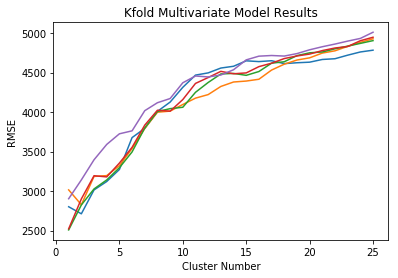

In [23]:
# Developing the Kfold plot series
for k, v in rmse_mvmc.items():
    X = list(v.keys())
    y = list(v.values())
    
    plt.plot(X, y)
    plt.xlabel("Cluster Number")
    plt.ylabel("RMSE")
    plt.title("Kfold Multivariate Model Results")
plt.show()

### Compare Results of Two Different Model Approaches

#### Univariate Model Errors

In [24]:
UVE = pd.DataFrame.from_dict(rmse_dict, orient='index')
UVE.columns = ["Nearest Neighbors"]
UVE["KFold"] = pd.DataFrame.from_dict(rmse_val_kfd, orient='index')
uve_delta = ((UVE['KFold'] - UVE['Nearest Neighbors'])*100/UVE['Nearest Neighbors']).mean()
print("Overall change in the error matrix = " + str(round(uve_delta, 2)) + "%\n")
UVE

Overall change in the error matrix = -6.31%



,Nearest Neighbors,KFold
normalized-losses,7338.850271,7441.517814
wheel-base,5486.805327,5116.804073
length,5455.571648,5788.265245
width,4931.242156,5293.788718
height,7857.627254,8786.488585
curb-weight,4422.255746,3501.748088
bore,6822.548760,5315.196622
stroke,7965.733340,6494.111633
compression-rate,6628.568723,5887.687591
horsepower,4011.999336,3046.297349


#### Multivariate Model Errors for Multiclusters

In [25]:
multiclusters_nn = {}
mutliclusters_kfd = {}

for k, v in RMSE_MC.items():
    multiclusters_nn[k] = sum(v.values())/len(v.values())

for k, v in rmse_kfd_mc.items():
    mutliclusters_kfd[k] = sum(v.values())/len(v.values())

MCE = pd.DataFrame.from_dict(multiclusters_nn, orient='index')
MCE.columns = ["Nearest Neighbors"]
MCE["KFold"] = pd.DataFrame.from_dict(mutliclusters_kfd, orient='index')
mce_delta = ((MCE['KFold'] - MCE['Nearest Neighbors'])*100/MCE['Nearest Neighbors']).mean()
print("Overall change in the error matrix = " + str(round(mce_delta, 2)) + "%\n")
MCE

Overall change in the error matrix = -21.37%



,Nearest Neighbors,KFold
normalized-losses,9111.307924,6946.285501
wheel-base,8995.633640,5116.810864
length,8559.743870,5439.649080
width,7650.761584,4673.577968
height,10897.737723,8960.175704
curb-weight,5552.581136,4648.574340
bore,13059.823628,7653.511167
stroke,9678.461939,7974.481579
compression-rate,8046.276054,6730.275489
horsepower,4806.749996,3848.512285


#### Multivariate Model Errors for Top 5 Best Features

In [26]:
# Getting the average value of each of the top 5 best features
multivariate_nn = {}
mutlivariate_kfd = {}

for k, v in rmse_mvc.items():
    multivariate_nn[k] = sum(v.values())/len(v.values())

for k, v in rmse_mvmc.items():
    mutlivariate_kfd[k] = sum(v.values())/len(v.values())

MVE = pd.DataFrame.from_dict(multivariate_nn, orient='index')
MVE.columns = ["Nearest Neighbors"]
MVE["KFold"] = pd.DataFrame.from_dict(mutlivariate_kfd, orient='index')
mve_delta = ((MVE['KFold'] - MVE['Nearest Neighbors'])*100/MVE['Nearest Neighbors']).mean()
print("Overall change in the error matrix = " + str(round(mve_delta, 2)) + "%\n")
MVE

Overall change in the error matrix = -3.82%



,Nearest Neighbors,KFold
two_best_features,4512.159647,4174.911476
three_best_features,4519.335087,4142.308676
four_best_features,4279.908275,4147.376966
five_best_features,4185.179948,4185.179948
six_best_features,4326.870948,4318.879369


### Conclusion